In [2]:
%matplotlib inline
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train data set shape (540, 2500) (540,)
test data set shape (100, 2500) (100,)


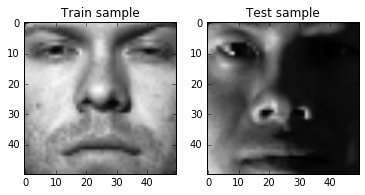

In [3]:
train_labels, train_data = [], []
test_labels, test_data = [], []

with open('./faces/train.txt') as f:
    for line in f:
        im = misc.imread(line.strip().split()[0])
        train_data.append(im.reshape(2500,))
        train_labels.append(line.strip().split()[1])
        
with open('./faces/test.txt') as f:
    for line in f:
        im = misc.imread(line.strip().split()[0])
        test_data.append(im.reshape(2500,))
        test_labels.append(line.strip().split()[1])
    
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)
print "train data set shape", train_data.shape, train_labels.shape
print "test data set shape", test_data.shape, test_labels.shape

plt.subplot(1, 2, 1)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Train sample')
plt.subplot(1, 2, 2)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title('Test sample')
plt.show()

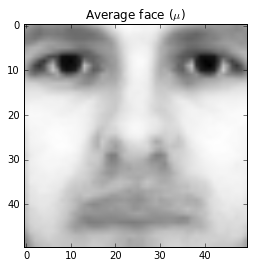

In [25]:
#1.(c) Average face.
mu = np.apply_along_axis(np.mean, 0, train_data)
plt.imshow(mu.reshape(50,50), cmap = cm.Greys_r)
plt.title('Average face ($\mu$)')
plt.show()

In [20]:
print mu.shape
print train_data.shape
print (train_data - mu).shape

(2500,)
(540, 2500)
(540, 2500)


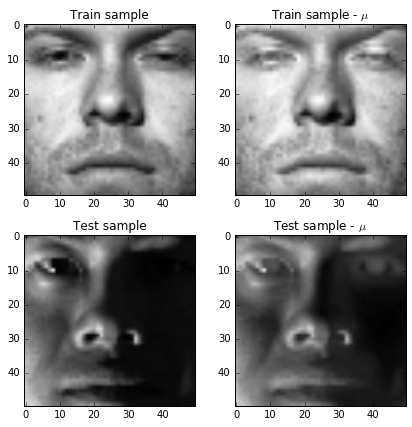

In [54]:
_tr = train_data - mu
_te = test_data - mu

plt.figure(figsize=(6, 6))
plt.subplot(2,2,1)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.title("Train sample")

plt.subplot(2,2,2)
plt.imshow(_tr[10,:].reshape(50,50), cmap = cm.Greys_r)
plt.title("Train sample - $\mu$")

plt.subplot(2,2,3)
plt.imshow(test_data[10,:].reshape(50,50), cmap = cm.Greys_r)
plt.title("Test sample")

plt.subplot(2,2,4)
plt.imshow(_te[10,:].reshape(50,50), cmap = cm.Greys_r)
plt.title("Test sample - $\mu$")

plt.tight_layout()
plt.show()

In [26]:
# 1.(e) Eigenface

# SVD decomposition
u, s, v = np.linalg.svd(_tr)
print u.shape, s.shape, v.shape

(540, 540) (540,) (2500, 2500)


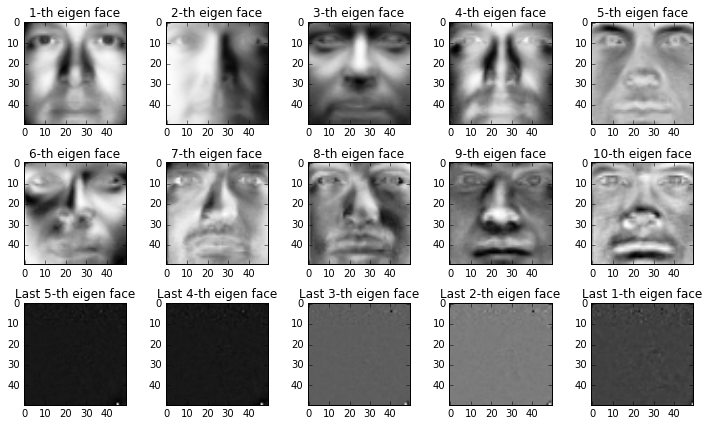

In [28]:
plt.figure(figsize=(10, 6))
for i in xrange(10):
    plt.subplot(3, 5, i + 1)
    plt.imshow(v[i,:].reshape(50,50), cmap = cm.Greys_r)
    plt.title('%d-th eigen face' % (i+1))

for j in xrange(5):
    plt.subplot(3, 5, j + 11)
    plt.imshow(v[j - 5, :].reshape(50,50), cmap = cm.Greys_r)
    plt.title('Last %d-th eigen face' % (5-j))
    
    
plt.tight_layout()
plt.show()

In [31]:
#1.(f) low rank approx
def gen_Xr(r):
    return u[:, :r].dot(np.diag(s[:r]).dot(v[:r, :]))

low_rank_err = []
for r in xrange(1, 201):
    low_rank_err.append(np.linalg.norm(gen_Xr(r) - train_data, ord='fro'))

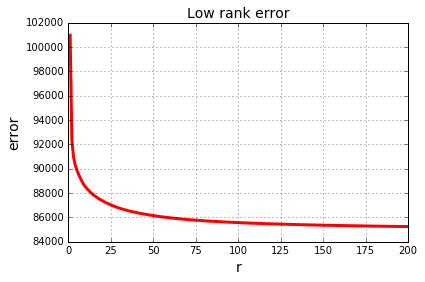

In [42]:
plt.figure(figsize=(6,4))
plt.plot(xrange(1, 201), low_rank_err, 'r', linewidth=3)
plt.xticks(xrange(0, 201, 25))
plt.title("Low rank error", fontsize=14)
plt.xlabel('r', fontsize=14)
plt.ylabel('error', fontsize=14)
plt.grid()
plt.tight_layout()

In [45]:
# 1.(g) p -> r features

def gen_eigenFace_feature(V, X, r=1):
    """
        V: p * p
        X: N * p
        r: rank
    """
    return X.dot(V[:r, :].T)

def get_eigen_face_feature(v, train, test, r=1):
    return gen_eigenFace_feature(v, train, r),\
                gen_eigenFace_feature(v, test, r)

In [82]:
# 1.(h)

# feature_count = 100
# X_f_train = gen_eigenFace_feature(v, train_data, r=feature_count)
# X_f_test = gen_eigenFace_feature(v, test_data, r=feature_count)
# print X_f_train.shape
# print X_f_test.shape

# print X_f_train[:10, :]

(540, 100)
(100, 100)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

    
accu = []
for r in xrange(1, 201):
    tr, te = get_eigen_face_feature(v, _tr, _te, r)
    cls = LogisticRegression()
    cls.fit(tr, train_labels)
    accu.append(cls.score(te, test_labels))
    
print len(accu)

200


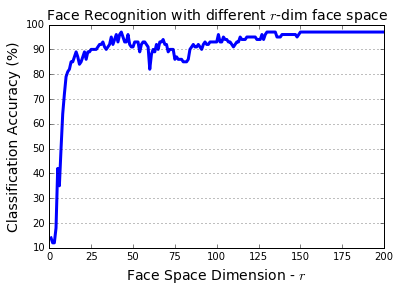

In [52]:
plt.figure(figsize=(6, 4))
plt.plot(xrange(1,201), np.array(accu) * 100, linewidth=3)
plt.xticks(xrange(0, 201, 25))
plt.grid(axis='y')
plt.xlabel("Face Space Dimension - $r$", fontsize=14)
plt.ylabel("Classification Accuracy (%)", fontsize=14)
plt.title("Face Recognition with different $r$-dim face space", fontsize=14)
plt.show()

In [21]:
aaa = np.array([[1, 2, 10], [2, 3, 6]])
bbb = np.array([10, 5, 3])
print aaa.shape
print bbb.shape
print aaa - bbb.T

(2, 3)
(3,)
[[-9 -3  7]
 [-8 -2  3]]


In [53]:
%whos

Variable                 Type                  Data/Info
--------------------------------------------------------
LogisticRegression       type                  <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
StandardScaler           type                  <class 'sklearn.preproces<...>ing.data.StandardScaler'>
aaa                      ndarray               2x3: 6 elems, type `int64`, 48 bytes
accu                     list                  n=200
bbb                      ndarray               3: 3 elems, type `int64`, 24 bytes
cls                      LogisticRegression    LogisticRegression(C=1.0,<...>bose=0, warm_start=False)
cm                       module                <module 'matplotlib.cm' f<...>kages/matplotlib/cm.pyc'>
f                        file                  <closed file './faces/tes<...>de 'r' at 0x7fabb0af3d20>
gen_Xr                   function              <function gen_Xr at 0x7faba99c0cf8>
gen_eigenFace_feature    function              <function gen_eigenFac